<a href="https://colab.research.google.com/github/eftekhar-hossain/Teaching/blob/main/Lab_04_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ETE-456 Machine Learning Sessional

Lab-03: **Exploring different types of Regression**

> Objective: 
 1. *Apply various regression algorithms on the real world dataset.*



Different types of Regression Algorithm

1. Linear Regression (Univariate or Multivariate)
2. Support Vector Regression
3. Decision Tree Regression
4. Random Forest Regressrion


In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import the libraries

In [2]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

#Simple Linear Regression

##Dataset

In [ ]:
# Download the data
!wget -O Salary_Data.csv https://www.dropbox.com/s/qq08pgcg9vbbztr/Salary_Data.csv?dl=0

In [4]:
"""importing the dataset """

dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
feature = dataset[['YearsExperience']]  # for independent
target = dataset[['Salary']]   # for dependent

In [ ]:
feature

In [ ]:
target

##Splitting the Dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [8]:
print(X_train.shape)
print(X_test.shape)

(24, 1)
(6, 1)


In [10]:
X_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [9]:
# Fitting a simple linear regression to Training Set
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()


regressor.fit(X_train,y_train)

LinearRegression()

In [11]:
# predicting the Test set Results
y_pred = regressor.predict(X_test)

In [13]:
y_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0


In [17]:
X_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [12]:
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

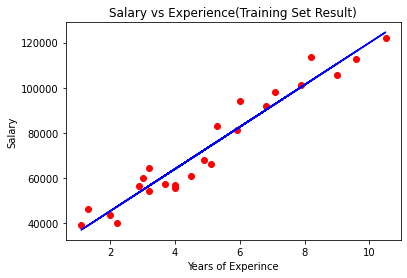

In [15]:
# Visualization the training Set Results

plt.scatter(X_train, y_train, color = 'red')
# this line is for the regressor line 
plt.plot(X_train,regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience(Training Set Result)')
plt.xlabel('Years of Experince')
plt.ylabel('Salary')
plt.show()


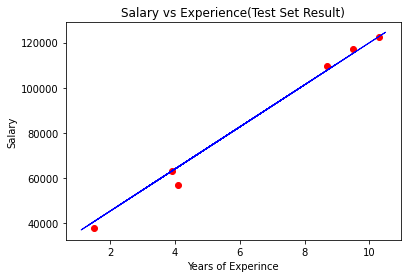

In [16]:
# Visualization the testing Set Results

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,regressor.predict(X_train), color = 'blue',linewidth=1)
plt.title('Salary vs Experience(Test Set Result)')
plt.xlabel('Years of Experince')
plt.ylabel('Salary')
plt.show()


#Multivariate Regression Dataset-1

In [ ]:
# Download the data
!wget -O 50_Startups.csv https://www.dropbox.com/s/5zrh7y4v2sjuus4/50_Startups.csv?dl=0

In [20]:
"""importing the dataset """

dataset = pd.read_csv('50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [23]:
# Feature Columns
features = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
# Target Columns
target = dataset[['Profit']]

In [ ]:
features

In [ ]:
target

##One Hot Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [25]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(features[['State']]))

In [26]:
encoded_labels.columns = encoder.get_feature_names(['State'])
dataset= pd.concat([features, encoded_labels ], axis=1)

In [27]:
dataset

,R&D Spend,Administration,Marketing Spend,State,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,0.0,1.0,0.0
5,131876.90,99814.71,362861.36,New York,0.0,0.0,1.0
6,134615.46,147198.87,127716.82,California,1.0,0.0,0.0
7,130298.13,145530.06,323876.68,Florida,0.0,1.0,0.0
8,120542.52,148718.95,311613.29,New York,0.0,0.0,1.0
9,123334.88,108679.17,304981.62,California,1.0,0.0,0.0


In [ ]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [28]:
new_features = dataset[['R&D Spend', 'Administration', 'Marketing Spend',
       'State_California', 'State_Florida', 'State_New York']]

##Splitting the Dataset

In [29]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(new_features,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [30]:
print(X_train.shape)
print(X_test.shape)

(40, 6)
(10, 6)


In [ ]:
X_train

In [32]:
# Fitting Multiple Linear Regression Model to Training Set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

# Predicting the Test Set Results
y_pred = regressor.predict(X_test)

In [34]:
y_test

,Profit
28,103282.38
11,144259.40
10,146121.95
41,77798.83
2,191050.39
27,105008.31
38,81229.06
31,97483.56
22,110352.25
4,166187.94


In [33]:
y_pred

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230165],
       [ 67851.69209676],
       [ 98791.73374687],
       [113969.43533012],
       [167921.0656955 ]])

##Evaluation Metrices

1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. R-Squared Error

In [ ]:
from sklearn.metrics import mean_absolute_error

# MAE

mean_absolute_error(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

83502864.03257766

In [35]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9347068473282423

#Feature Scaling

It is necessary because sometimes a large value in the variable can dominate the small value. 


In [ ]:
dataset

In [38]:
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
y_sc = StandardScaler()
X_train_new = X_sc.fit_transform(X_train[['R&D Spend',	'Administration',	'Marketing Spend']])
X_test_new = X_sc.transform(X_test[['R&D Spend',	'Administration',	'Marketing Spend']])
y_train_new = y_sc.fit_transform(y_train[['Profit']])
y_test_new = y_sc.transform(y_test[['Profit']])

#Support Vector Regression

[Sklearn Link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [39]:
# Fitting SVR to the dataset
from sklearn.svm import SVR 

regressor = SVR(kernel = 'linear')
regressor.fit(X_train_new,y_train_new)

SVR(kernel='linear')

In [40]:
y_pred = regressor.predict(X_test_new)

In [41]:
r2_score(y_test_new, y_pred)

0.9417423192995892

In [ ]:
# Predicting a new result
# since now we see the scaling output for this we have to convert this 
# into real value
# here double [[]] is used to convert the value into a matrix
#y_pred1 = y_sc.inverse_transform(regressor.predict(X_sc.transform(np.array([[6.5]]))))

#Decision Tree Regression

[Sklearn Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [42]:
# Fitting the decision tree regression with the dataset
from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train_new,y_train_new) 


DecisionTreeRegressor(random_state=0)

In [43]:
y_pred = regressor.predict(X_test_new)
r2_score(y_test_new, y_pred)

0.9766026460977932

#Random Forest Regression

[Sklearn Link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [44]:
# Fitting the Random Forest Regression with the dataset
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10,random_state = 0) # n estiamator is the number of decision trees
regressor.fit(X_train_new,y_train_new) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [45]:
y_pred = regressor.predict(X_test_new)
r2_score(y_test_new, y_pred)

0.9616327103677941

#Reference


1.   [SuperDataScience](https://www.superdatascience.com/pages/machine-learning)



##Dataset (Medical Cost Personal Datasets)


Columns

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance


**Task**

Can you accurately predict insurance costs?

In [ ]:
# Download the data
!wget -O insurance.csv https://www.dropbox.com/s/mwgqgjbmfw0xa5p/insurance.csv?dl=0

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
